## Digits - submission 2: 

https://www.kaggle.com/sjun1008/mnist-with-pure-tensorflow-0-99542

__Notes:__

In [1]:
import pandas as pd, numpy as np, tensorflow as tf, sys

import matplotlib.pyplot as plt, matplotlib.cm as cm
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


/Users/jacob/anaconda3/envs/tf_digit/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
X = pd.read_csv('train.csv')#.iloc[:1000, :] 
X_test = pd.read_csv('test.csv')#.iloc[:200, :] 

labels = X.iloc[:, 0]
X.drop(['label'], axis=1, inplace=True)

print(X.shape); print(X_test.shape); print(labels.shape); X.head(2)

(42000, 784)
(28000, 784)
(42000,)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,...,pixel534,pixel535,pixel536,pixel537,pixel538,pixel539,pixel540,pixel541,pixel542,pixel543,pixel544,pixel545,pixel546,pixel547,pixel548,pixel549,pixel550,pixel551,pixel552,pixel553,pixel554,pixel555,pixel556,pixel557,pixel558,pixel559,pixel560,pixel561,pixel562,pixel563,pixel564,pixel565,pixel566,pixel567,pixel568,pixel569,pixel570,pixel571,pixel572,pixel573,pixel574,pixel575,pixel576,pixel577,pixel578,pixel579,pixel580,pixel581,pixel582,pixel583,pixel584,pixel585,pixel586,pixel587,pixel588,pixel589,pixel590,pixel591,pixel592,pixel593,pixel594,pixel595,pixel596,pixel597,pixel598,pixel599,pixel600,pixel601,pixel602,pixel603,pixel604,pixel605,pixel606,pixel607,pixel608,pixel609,pixel610,pixel611,pixel612,pixel613,pixel614,pixel615,pixel616,pixel617,pixel618,pixel619,pixel620,pixel621,pixel622,pixel623,pixel624,pixel625,pixel626,pixel627,pixel628,pixel629,pixel630,pixel631,pixel632,pixel633,pixel634,pixel635,pixel636,pixel637,pixel638,pixel639,pixel640,pixel641,pixel642,pixel643,pixel644,pixel645,pixel646,pixel647,pixel648,pixel649,pixel650,pixel651,pixel652,pixel653,pixel654,pixel655,pixel656,pixel657,pixel658,pixel659,pixel660,pixel661,pixel662,pixel663,pixel664,pixel665,pixel666,pixel667,pixel668,pixel669,pixel670,pixel671,pixel672,pixel673,pixel674,pixel675,pixel676,pixel677,pixel678,pixel679,pixel680,pixel681,pixel682,pixel683,pixel684,pixel685,pixel686,pixel687,pixel688,pixel689,pixel690,pixel691,pixel692,pixel693,pixel694,pixel695,pixel696,pixel697,pixel698,pixel699,pixel700,pixel701,pixel702,pixel703,pixel704,pixel705,pixel706,pixel707,pixel708,pixel709,pixel710,pixel711,pixel712,pixel713,pixel714,pixel715,pixel716,pixel717,pixel718,pixel719,pixel720,pixel721,pixel722,pixel723,pixel724,pixel725,pixel726,pixel727,pixel728,pixel729,pixel730,pixel731,pixel732,pixel733,pixel734,pixel735,pixel736,pixel737,pixel738,pixel739,p

In [3]:
image_size = X.shape[1]
print("Number of pixels per image: {} ranging {} to {}".format(image_size, X.values.min(), X.values.max()))

image_width = image_height = np.ceil(np.sqrt(image_size)).astype(np.uint8)
print("Image size: {}x{}".format(image_width, image_height))

num_colors = 1 # There are in black and white

Number of pixels per image: 784 ranging 0 to 255
Image size: 28x28


In [4]:
# X = X / 255.0
# X_test = X_test / 255.0

# from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

# labels = pd.DataFrame(to_categorical(labels, num_classes = 10))

# num_labels = labels.shape[1]


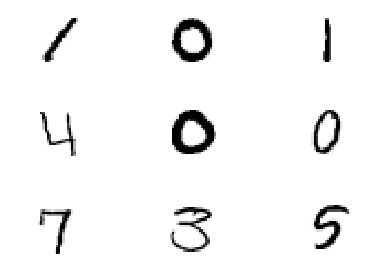

In [5]:
# plot/for loop restricts the number of values that can be used to < 10
for i in range(0, 9):
    image = X.iloc[i, :].values
    plt.subplot(3, 3, i+1)
    plt.imshow(image.reshape(image_width, image_height), cmap=cm.binary)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, labels,
                                                      test_size=0.1, 
                                                      random_state=81)
dframes = [X_train, X_valid, y_train, y_valid]

for frame in dframes:
    frame.reset_index(drop=True, inplace=True)
    print(frame.shape)
    

(37800, 784)
(4200, 784)
(37800,)
(4200,)


In [7]:
# CONVERT TO ARRAY AND RESHAPE
X_train = X_train.values.reshape([-1, image_width, image_height, 1]).astype("float32")
X_valid = X_valid.values.reshape([-1, image_width, image_height, 1]).astype("float32")
X_test = X_test.values.reshape([-1, image_width, image_height, 1]).astype("float32")
print('{} \n{}'.format(X_train.shape, X_valid.shape))


(37800, 28, 28, 1) 
(4200, 28, 28, 1)


In [8]:
def genAugmentedImg(img, label, num_data=10000):
    gen_data = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    fill_mode='nearest')
    
    gen_data.fit(X_train)
    data = gen_data.flow(img, label, batch_size=num_data)
    
    return data[0][0], data[0][1]

In [9]:
X_aug_train, y_aug_train = genAugmentedImg(X_train, y_train, 20000)
X_aug_valid, y_aug_valid = genAugmentedImg(X_valid, y_valid, 5000)

print("X_aug_train shape :", X_aug_train.shape)
print("y_aug_train shape :", y_aug_train.shape)


X_aug_train shape : (2000, 28, 28, 1)
y_aug_train shape : (2000,)


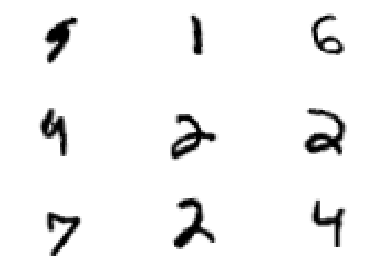

In [10]:
for i in range(0, 9):
    image = X_aug_train[i, :, :, 0]
    plt.subplot(3, 3, i+1)
    plt.imshow(image, cmap=cm.binary)
    plt.axis('off')
plt.tight_layout()
plt.show()


In [11]:
X_train = np.concatenate((X_train, X_aug_train, X_aug_valid), axis=0)
y_train = np.concatenate((y_train, y_aug_train, y_aug_valid), axis=0)

In [12]:
def normalizer(dframe): 
    dframe = (dframe - X_train.min()) / (X_train.max() - X_train.min())
    return(dframe)

X_train = normalizer(X_train)
X_valid = normalizer(X_valid)
X_test = normalizer(X_test)

In [13]:
from keras.utils.np_utils import to_categorical 

y_train = to_categorical(y_train, num_classes = 10)
y_valid= to_categorical(y_valid, num_classes = 10)

num_labels = y_train.shape[1]


Using TensorFlow backend.


In [14]:
def shuffleData(x, y): 
    idx = np.arange(0, x.shape[0])
    np.random.shuffle(idx)    
    return x[idx], y[idx]

In [15]:
# test1 = np.random.randint(5, size=(10,8))
# print(test1)
# idx = np.arange(0, test1.shape[0])
# np.random.shuffle(idx)
# print('\n', test1[idx])

In [16]:
epochs_completed = 0
index_in_epoch = 0

def next_batch(x, y, batch_size):

    global index_in_epoch
    global epochs_completed
       
    num_examples = x.shape[0]
    start = index_in_epoch
    index_in_epoch += batch_size

    if index_in_epoch > num_examples:
        # finished epoch
        epochs_completed += 1
        # shuffle the data
        x, y = shuffleData(x, y)
        # start next epoch
        start = 0
        index_in_epoch = batch_size  
    end = index_in_epoch
    yield x[start:end], y[start:end]

In [17]:
tf.reset_default_graph()
tf.set_random_seed(81)
np.random.seed(81)

alpha = 0.1
x_kernel = tf.contrib.layers.xavier_initializer()


# PLACEHOLDERS
x = tf.placeholder(tf.float32, [None, 28, 28, 1])
y = tf.placeholder(tf.float32, [None, num_labels])
learning_rate = tf.placeholder(tf.float32)
non_dropout = tf.placeholder(tf.float32)


images = tf.reshape(x, [-1, image_width, image_height, num_colors])
# (batch, height, width, channel)

# CNN
conv1_a = tf.layers.conv2d(inputs=images, filters=32, kernel_size=5, strides=(1,1),
                        padding='same',activation=tf.nn.relu,
                        kernel_initializer=x_kernel)  
conv1_b = tf.layers.conv2d(inputs=conv1_a, filters=32, kernel_size=5, strides=(1,1),
                        padding='same',activation=tf.nn.relu,
                        kernel_initializer=x_kernel)  
pool1 = tf.layers.max_pooling2d(conv1_b,pool_size=2, strides=2)
drop1 = tf.nn.dropout(pool1, keep_prob=0.75)

conv2_a = tf.layers.conv2d(drop1, 64, 5, padding='same', activation=tf.nn.relu, 
                           kernel_initializer=x_kernel)
conv2_b = tf.layers.conv2d(conv2_a, 64, 5, padding='same', activation=tf.nn.relu, 
                           kernel_initializer=x_kernel)
pool2 = tf.layers.max_pooling2d(conv2_b,pool_size=2, strides=2)
drop2 = tf.nn.dropout(pool2, keep_prob=0.75)


# FULL CONNECTED LAYER
fc1_a = tf.contrib.layers.flatten(drop2)
fc1_b = tf.layers.dense(fc1_a, 256, kernel_initializer=x_kernel)
fc1_c = tf.layers.batch_normalization(fc1_b)
fc1_d = tf.maximum(fc1_c, fc1_c*alpha)
fc1_e = tf.nn.dropout(fc1_d, non_dropout)

fc2_a = tf.contrib.layers.flatten(fc1_e)
fc2_b = tf.layers.dense(fc2_a, 128, kernel_initializer=x_kernel)
fc2_c = tf.layers.batch_normalization(fc2_b)
fc2_d = tf.maximum(fc2_c, fc2_c*alpha)
fc2_e = tf.nn.dropout(fc2_d, non_dropout)

logits = tf.layers.dense(fc2_e, 10, kernel_initializer=x_kernel)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)


correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

pred = tf.argmax(logits, 1)


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [18]:
# chart
chart = {}
chart["train_acc"] = []
chart["val_acc"] = []

In [19]:
# WITHOUT CLASS FUNCTION

def train(epochs, batch_size, keep_probability, lr):
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())

        for i in range(epochs + 1):

            for x_batch, y_batch in next_batch(X_train, y_train, batch_size):  
                sess.run(optimizer, feed_dict={x: x_batch, y: y_batch, non_dropout: keep_probability, learning_rate:lr})

            accuracy_train = accuracy.eval({x: x_batch, y: y_batch, non_dropout: 1.0})
            accuracy_val = accuracy.eval({x: X_valid, y: y_valid, non_dropout: 1.0})

            # PRINT OUT A MESSAGE EVERY 100 STEPS
            if i%100 == 0:
                print('epoch {}'.format(i))
                print('Training acc: {:.4f} \n Validation acc: {:.4f}'.format(accuracy_train, accuracy_val))
                
                chart['train_acc'].append(accuracy_train)
                chart['val_acc'].append(accuracy_val)
                
        output = pred.eval({x: X_test, non_dropout: 1.0})
#         save_path = saver.save(sess, 'models/model_cnn')             

    return output


In [20]:
epochs = 200
batch_size = 128
keep_probability = 0.5
lr = 0.001

predictions = train(epochs, batch_size, keep_probability, lr)

epoch 0
Training acc: 0.1719 
 Validation acc: 0.1629
epoch 100
Training acc: 0.9297 
 Validation acc: 0.9038
epoch 200
Training acc: 0.9609 
 Validation acc: 0.9467


In [21]:
df_out = pd.DataFrame(predictions)
df_out.index = [x + 1 for x in df_out.index]
df_out.rename(columns={0: 'Label'}, inplace=True)
df_out.index.name = "ImageId"

df_out.to_csv("predictions_2.csv")
df_out.head()

,Label
ImageId,
1,2
2,0
3,9
4,9
5,3


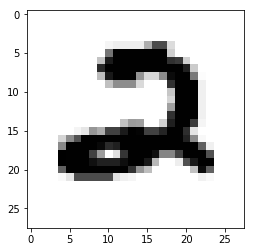

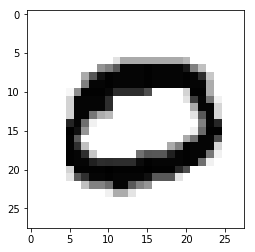

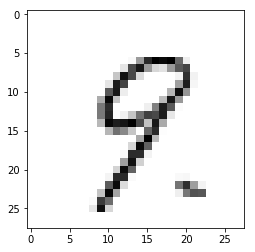

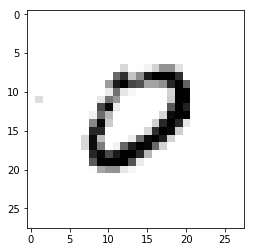

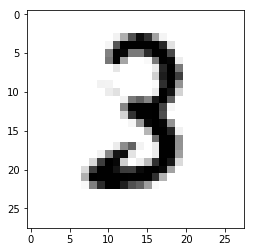

In [22]:
for index in range(5):
    plt.figure()
    image = X_test[index,:]
    plt.imshow(image.reshape(image_width, image_height), cmap=cm.binary)

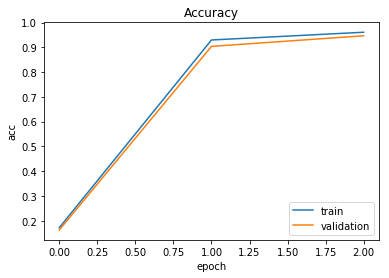

In [23]:
# plot acc
plt.plot(chart["train_acc"])
plt.plot(chart["val_acc"])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['train', 'validation'], loc=4),
plt.show()